In [1]:
#ST10203068 ZWIVHUYA LALUMBE

# Importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,r2_score

# Loading the data
df=pd.read_csv("C:/Users/RC_Student_lab/Downloads/insurance (1).csv")

#Displaying the first few rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    133

C:\Users\RC_Student_lab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


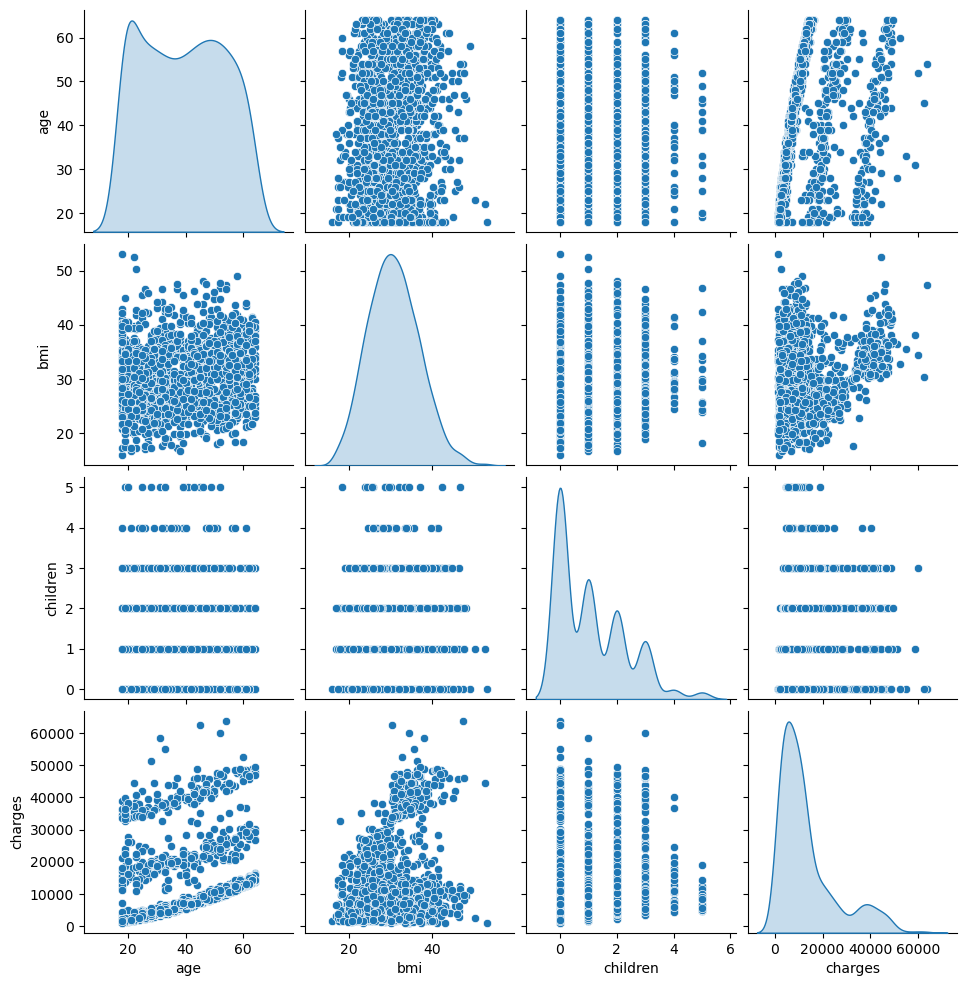

In [2]:
# checking for missing values
print(df.isnull().sum())

# Getting summary statistics
print(df.describe())

# Checking data types 
print(df.info())

#Visualising distributions
sns.pairplot(df, diag_kind="kde")
plt.show()

In [3]:
# converting categorical variables to numerical using one-hot encoding
df=pd.get_dummies(df, columns=["sex","smoker","region"], drop_first=True)

# Displaying updated dataframe
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [4]:
# Defining features (x) and target variables (y) 
x=df.drop(columns=["charges"]) # Features
y=df["charges"] # Target variables

# Slpt into 80% training and 20% testing data
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

# Checking the shape of the slip data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

In [5]:
# Initializing and training the model
model=LinearRegression()
model.fit(x_train, y_train)

# Get model coefficients
print("model coefficients:",model.coef_)
print("model Intercept", model.intercept_)

model coefficients: [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]
model Intercept -11931.219050326681


In [6]:
# Making predictions on the test set
y_pred=model.predict(x_test)

# Evaluating model perfomance
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("mean squared Error:{mse}")
print(f"R² score:{r2}")

mean squared Error:{mse}
R² score:0.7835929767120724


In [ ]:
### References:
- McKinney, W. (2023). *pandas documentation: Reading and writing files.* Available at: [https://pandas.pydata.org/](https://pandas.pydata.org/) [Accessed 28 March 2025].
- Scikit-learn Developers (2024). *Linear Regression Example.* Available at: [https://scikit-learn.org/stable/modules/linear_model.html](https://scikit-learn.org/stable/modules/linear_model.html) [Accessed 28 March 2025].
- Kaggle (2023). *Medical Insurance Cost Dataset.* Available at: [https://www.kaggle.com/datasets/mirichoi0218/insurance](https://www.kaggle.com/datasets/mirichoi0218/insurance) [Accessed 28 March 2025].

# Original code from Scikit-learn documentation: https://scikit-learn.org/stable/modules/linear_model.html
# Modified to fit the dataset used in this project
from sklearn.linear_model import LinearRegression

model = LinearRegression() # Initialize model


# Code adapted from pandas documentation: https://pandas.pydata.org/
# Retrieved on: 28 March 2025
import pandas as pd




In [7]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test)  # Ensure model is trained
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 33596915.85136145
R² Score: 0.7835929767120724


In [9]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 858634875.8320565
R² Score: -4.530704615628727


C:\Users\RC_Student_lab\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
